<a href="https://colab.research.google.com/github/arifkyramadhan/test/blob/main/Tugas_SLO_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of Wine Quality**





Pada tugas kali ini, kelompok kami mengambil dataset dari kaggle dengan topik 'Wine Quality'. 
Langkah pertama yang dilakukan adalah melakukan instalasi kaggle sehingga nantinya dapat terintegrasi dengan google collab dengan  menggunakan code dibawah ini


In [ ]:
#install the dependencies
!pip install kaggle  #digunakan untuk menginstall kaggle ( kaggle digunakan untuk mengambil beberapa file dataset)

Kemudian, dilakukan proses mengimport atau memasukan file yang telah didapat dilaptop kedalam google collab. 
File yang dipilih adalah kaggle.json yang dapat didownload ketika sudah membuat akun kaggle. 
Kaggel.json berfungsi untuk meintegrasikan google collab dengan kaggle sehingga ketika membutuhkan data set google collab akan mendownload secara otomatis.
Code yang digunakan dibawah ini


In [ ]:
from google.colab import files # digunakan untuk mengimport atau memasukan file dari laptop ke dalam google collab
files.upload() #digunakan untuk mengupload file yang sudah disimpan

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maritafauziah","key":"88242951e5aa570580d47038f6a6118a"}'}

Pada kodingan ini, melakukan pembuatan direktori untuk menyimpan kaggle.json yang sudah diimprot sebelumnya dan dilanjutkan mengubah akses file, sehingga user dapat membaca dan menulis file

In [ ]:
!mkdir -p ~/.kaggle # digunakan untuk membuat direktori kaggle
!cp kaggle.json ~/.kaggle/ #mengcopy file kaggle.json kedalam direktori kaggle yang telah dibuat 
!chmod 600 ~/.kaggle/kaggle.json #digunakan untuk mengubah izin atas file, dalam hal ini 600 dapat diartikan bahwa user dapat membaca dan menulis file 

Selanjutnya, pada code ini menjelaskan untuk meimport data set yang digunakan dalam codingan ini. Data set didapatkan melalui website kaggle kemudian pilih kolom copy API. Langkah selanjutnya menyalin dan memasukan link API dari data set yang digunakan. 
Pada code dibawah, dataset yang digunakan merupakan data set untuk kualitas dari wine.

In [ ]:
!kaggle datasets download -d rajyellow46/wine-quality #memasukan API Command dari Kaggle (pada code ini dataset yang digunakan adalah data set untuk kualitas wine)

  0% 0.00/98.0k [00:00<?, ?B/s]
100% 98.0k/98.0k [00:00<00:00, 78.0MB/s]


File data set yang didownload berbentuk Zipfile dikarenakan dataset yang disediakan oleh kaggle semua berbentuk zipfile/rar sehingga diperlukan proses unzip untuk membuka data set tersebut. 
Setelah proses unzip sudah selesai akan diberitahu dengan tanda "Done".
Didalam zipfile tersebut terdapat dataset berbentuk .csv , data tersebut yang dibutuhkan dalam proses ini

In [ ]:
from zipfile import ZipFile #mengimport zipfile yang digunakan untuk menunzip file dataset yang didapat dari kaggle
file_name = "wine-quality.zip"

with ZipFile(file_name, 'r') as zip: # melakukan proses unzip
  zip.extractall() #extract semua file yang ada di zip 
  print('Done') #pesan akan muncul setelah proses unzip selesai 

Done


Lalu, memasukkan beberapa library phyton yang digunakan dalam percobaan. Adapun library yang digunakan antara library untuk pengolahan data, analisa data, perhitungan scientific, visualisasi data dalam bentuk barplot & plot. Selain itu memasukan juga beberapa class yang didapat dari library sklearn.processing yang berfungsi sebagai pengubah string menjadi bentuk numerik dan dari library sklearn metric untuk melakukan proses kalkulasi. Dilanjutkan dengan memasukan satu class pada library sklearn.model_selection yang untuk membagi data. Dan dilanjutkan memasukan libary keras untuk memodelkan algoritma teknik ANN dan sklearn.neigbors yang digunakan untuk metode KNN. Detail kegunaan ada code dibawah ini. 



In [ ]:
import pandas as pd #Pandas adalah library phyton yang berfokus pada analisa data yang memiliki struktur data yang diperlukan untuk membersihkan data mentah  ke dalam sebuah bentuk yang cocok untuk dianalisis. Data disini berasal dari dataset yang sudah diimport sebelumnya
import seaborn as sns #Seaborn adalah library phyton yang digunakan untuk berfungsi untuk memproduksi visualisasi data, sebagai contoh untuk memrepresentasikan data kedalam grafik
import numpy as np #Numpy adalah library phyton yang fokus kepada scientific computing, biasanya digunakan untuk membuat objek N-dimensional array
import matplotlib.pyplot as plt #matplotlib adalah library yang memiliki fungsi sama dengan Seaborn, namun seaborn memiliki beberapa kelebihan dibandingkan matplotlib
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder #LabelEncoder adalah class yang didownload dari library sklearn.processing yang digunakan untuk mengubah string menjadi integer. Dalam code ini, mengubah kondisi menjadi numerik
from sklearn.preprocessing import StandardScaler #StandardScaler adalah class dari sklearn untuk melakukan normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang besar
from sklearn.model_selection import train_test_split #train_test_split #Train test split adalah class dari sklearn yang digunakan untuk membagi data menjadi dua bagian yaitu data tes dan train
import keras #memasukan library keras
from keras.models import Sequential #Sequential digunakan untuk mengatur layer keras dalam urutan, sequential sering digunakan dalam ANN ( )
from keras.layers import Activation, Dropout, Flatten, Dense 
from sklearn.metrics import accuracy_score #sklearn.metrics digunakan untuk mengklasifikasikan sesuatu #class digunakan untuk menghitung akurasi 
from sklearn.metrics import precision_score #class digunakan untuk menghitung presisi
import sklearn.metrics as metrics #sklearn.metrics digunakan untuk mengimplementasikan beberapa fungsi seperti loss, score, and utility untuk kinerja klasifikasi.
from sklearn.neighbors import KNeighborsClassifier #Classifier implementing the k-nearest neighbors vote

Pada codingan ini dilakukan proses pengubahan dataset menjadi DataFrame yang kemudian dilanjutkan dengan menampilkan isi dari dataset tersebut.

In [ ]:
anggur = pd.read_csv('winequalityN.csv') #digunakan untuk menjadikan dataset winequality menjadi DataFrame (anggur) menggunakan library panda
anggur.head() #digunakan untuk membaca serta memeriksa bagaimana data terdistribusi

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Setelah melihat isi dari dataset, dilakukan proses identifikasi tipe data dari data set tersebut. Hal tersebut dilakukan dengan codingan dibawah ini



In [ ]:
anggur.info() #menampilkan info seperti kolom tersebut merupakan integer, float atau jenis lain

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Selanjutnya menampilkan secara visual isi dari data set. Dibawah ini dilakukan ploting sesuai dengan jumlah kolom pada data set. Sumbu horizontal pada plot tersebut menginterpretasikan nilai setiap kolom sedangkan sumbu vertikal berisikan jumlah data dengan nilai tersebut. 

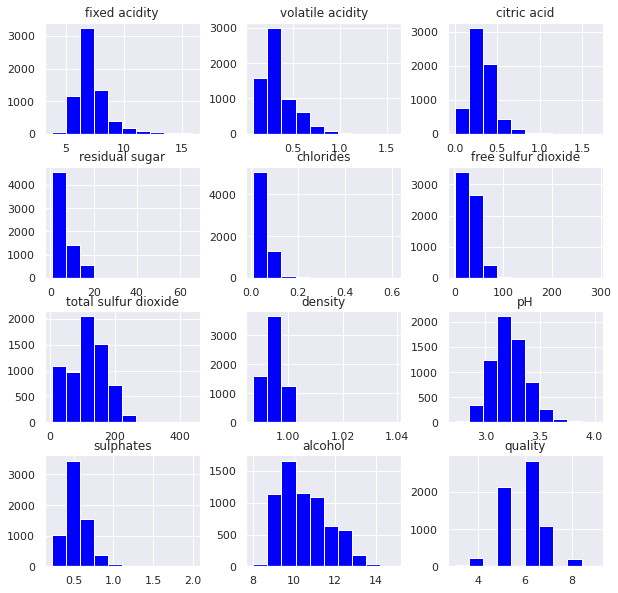

In [ ]:
sns.set() #digunakan sebagai interface
anggur.hist(figsize=(10,10), color='Blue') #.hist untuk mengatur bentuk dan warna grafik
plt.show() #digunakan untuk menampilkan grafik

Dapat dilihat bahwa dari dataset, pada kolom quality memiliki skala nilai 1-8 sehingga dilakukan proses klasifikasi kualitas dari wine tersebut. Pengklasifikasian dibagi menjadi dua bagian yaitu wine dengan kualitas bagus dengan kulaitas tidak bagus. Indeks nilai yang dijadikan acuan disesuaikan dengan keterangan yang ada pada kaggle.  Kemudian dilanjutkan mengganti kolom quality dengan kolom kualitas yang sudah disesuaikan dengan pengklasifikasian yang dilakukan. Data set anggur sebelumnya dicopy kedalam DataFrame baru yaitu data, kemudian kolom quality digantikan dengan kolom kualitas.
Detail tertera dibawah ini. 

In [ ]:
keterangan = anggur["quality"].values #mengganti isi di kolom "quality"
kualitas = []
for num in keterangan: #mengisi kolom quality
    if num < 6.5 :
      kualitas.append("Tidak Bagus")
    elif num>=6.5: 
      kualitas.append ("Bagus")

kualitas = pd.DataFrame(data=kualitas, columns=["kualitas"]) #menambah kolom "kualitas"
data= pd.concat([anggur,kualitas], axis =1) #digunakan untuk membuat dataframe baru dan memasukkan kolom"kualitas" ditabel
data.drop(columns="quality",axis=1,inplace=True) #menghilangkan kolom "quality"
data.head() #digunakan untuk membaca serta memeriksa bagaimana data terdistribusi

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kualitas
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Tidak Bagus
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Tidak Bagus
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Tidak Bagus
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Tidak Bagus
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Tidak Bagus


Setelah proses pengklasifikasian dilakukan. Dilanjutkan dengan memploting kolom kualitas untuk melihat perbandingan jumlah wine dengan kualitas yang bagus dan tidak bagus.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Tidak Bagus    5220
Bagus          1277
Name: kualitas, dtype: int64

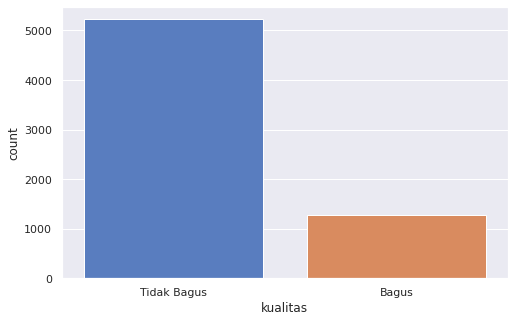

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data["kualitas"],palette="muted") #digunakan untuk membuat diagram batang
data["kualitas"].value_counts() #digunakan untuk mendapatkan Seri yang berisi jumlah nilai unik dengan elemen pertama adalah elemen yang paling sering muncul.

Code dibawah berfungsi untuk menampilkan plot korelasi setiap kolom satu dengan lainnya sehingga dapat dilihat parameter pada data set yang memiliki pengaruh paling tinggi dengan kualitas. Kemudian code dibawah juga digunakan untuk memberikan judul dan memvisualisasikan data pada gambar grafik.


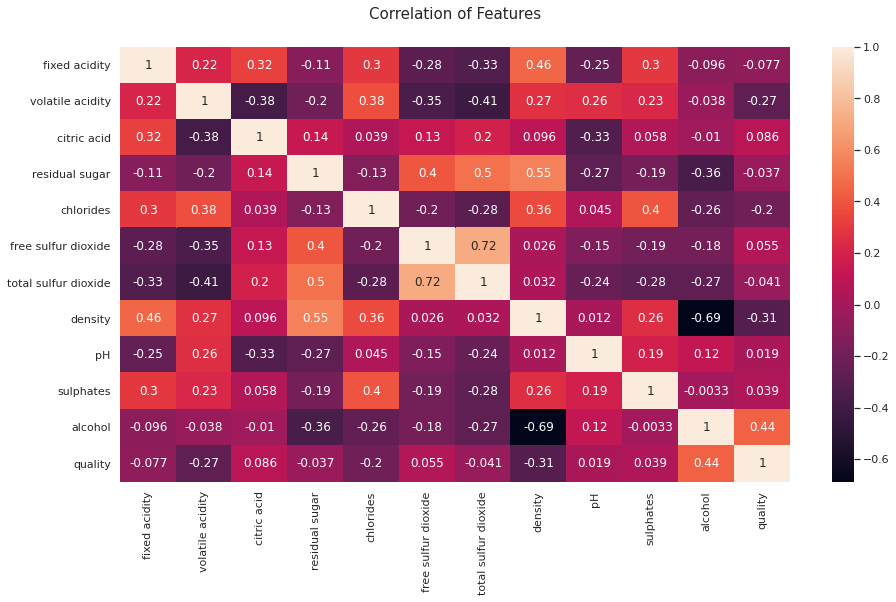

In [ ]:
plt.figure(figsize=(15,8)) #digunakan untuk plot gambar
plt.title('Correlation of Features', y=1.05, size=15) #digunakan untuk memberi judul
sns.heatmap(anggur.corr(),annot=True) #membuat korelasi setiap data set yang kemudian memvisualisasikannya

Selanjutnya, 11 gambar dibawah ini menjelaskan jumlah kualitas yang bagus dan tidak bagus disesuaikan dengan kolom pada dataa set ini, adapun kolom tersebut adalah fixed acidity, vioklatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality atau dapat dikatakan memploting hubungan setiap kolom pada data set  dengan kualitas. 
Dibawah ini ditampilkan hubungan Kualitas dengan fixed acidity 

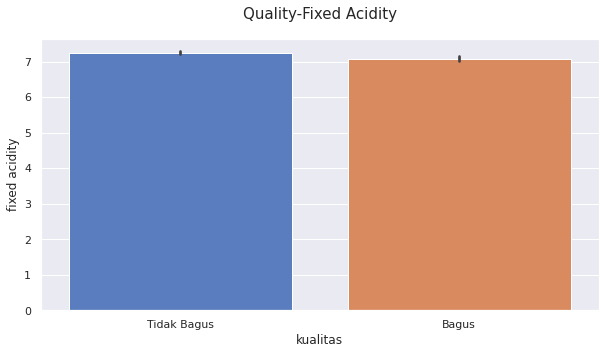

In [ ]:
plt.figure(figsize=(10,5)) #digunakan untuk plot gambar
plt.title('Quality-Fixed Acidity', y=1.05, size=15) #digunakan untuk memberi judul pada gambar
sns.barplot(x=data["kualitas"],y=data["fixed acidity"],palette="muted")#digunakan untuk menunjukkan perkiraan dan interval dengan menggunakan diagram batang

Selanjutnya, menampilkan gambar diagram batang hubungan Kualitas dengan Volatile Acidity dengan menggunakan code dibawah.

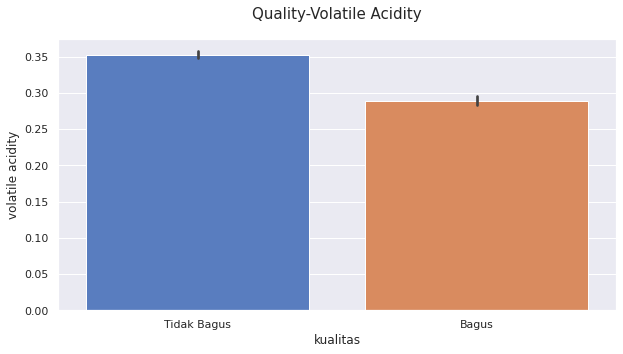

In [ ]:
plt.figure(figsize=(10,5)) #digunakan untuk membuat plot gambar
plt.title('Quality-Volatile Acidity', y=1.05, size=15) #digunakan untuk membuat judul pada gambar
sns.barplot(x=data["kualitas"],y=data["volatile acidity"],palette="muted") #digunakan untuk menunjukkan perkiraan dan interval dengan menggunakan diagram batang

Selanjutnya, menampilkan gambar diagram batang hubungan Kualitas dengan Citric Acid dengan menggunakan code dibawah.

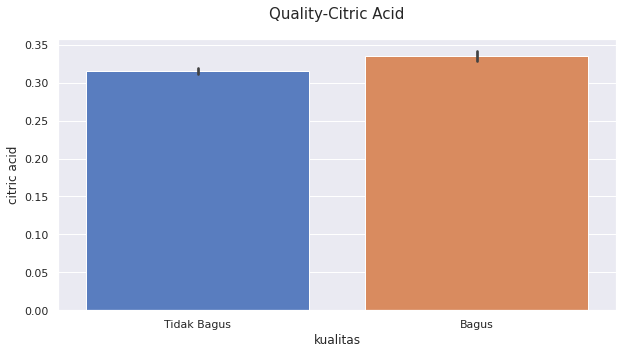

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Quality-Citric Acid', y=1.05, size=15)
sns.barplot(x=data["kualitas"],y=data["citric acid"],palette="muted")

Selanjutnya, menampilkan gambar diagram batang hubungan Kualitas dengan Residual Sugar  dengan menggunakan code dibawah.


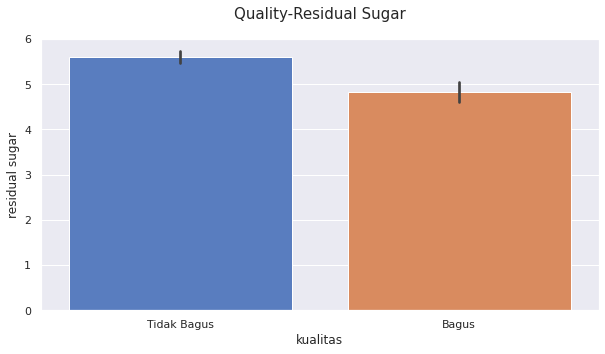

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Quality-Residual Sugar', y=1.05, size=15)
sns.barplot(x=data["kualitas"],y=data["residual sugar"],palette="muted")

Selanjutnya, menampilkan gambar diagram batang hubungan Kualitas dengan Chlorides  dengan menggunakan code dibawah.

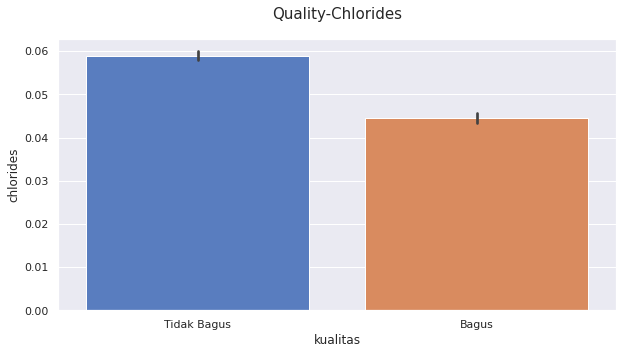

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Quality-Chlorides', y=1.05, size=15)
sns.barplot(x=data["kualitas"],y=data["chlorides"],palette="muted")

Selanjutnya, menampilkan gambar diagram batang hubungan Kualitas dengan Free Sulfur Dioxide dengan menggunakan code dibawah.

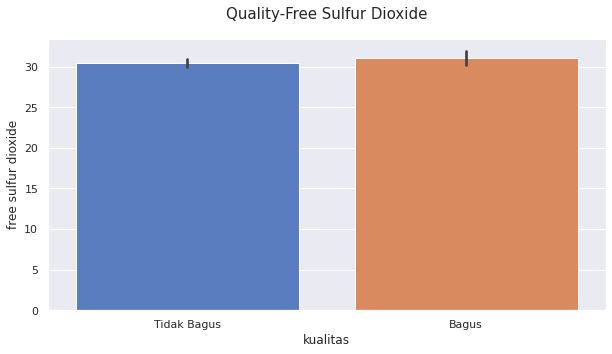

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Quality-Free Sulfur Dioxide', y=1.05, size=15)
sns.barplot(x=data["kualitas"],y=data["free sulfur dioxide"],palette="muted")

Selanjutnya, menampilkan gambar diagram batang hubungan Kualitas dengan Total Sulfur Dioxide dengan menggunakan code dibawah.

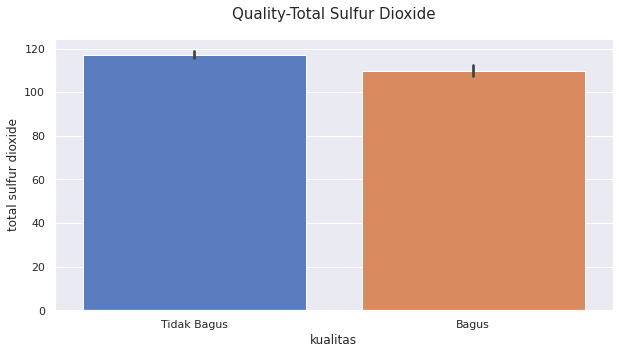

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Quality-Total Sulfur Dioxide', y=1.05, size=15)
sns.barplot(x=data["kualitas"],y=data["total sulfur dioxide"],palette="muted")

Selanjutnya, menampilkan gambar diagram batang hubungan Kualitas dengan density dengan menggunakan code dibawah.

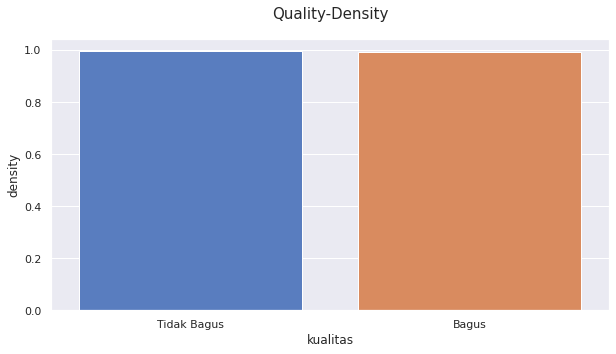

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Quality-Density', y=1.05, size=15)
sns.barplot(x=data["kualitas"],y=data["density"],palette="muted")

Selanjutnya, menampilkan gambar diagram batang hubungan Kualitas dengan pH dengan menggunakan code dibawah.

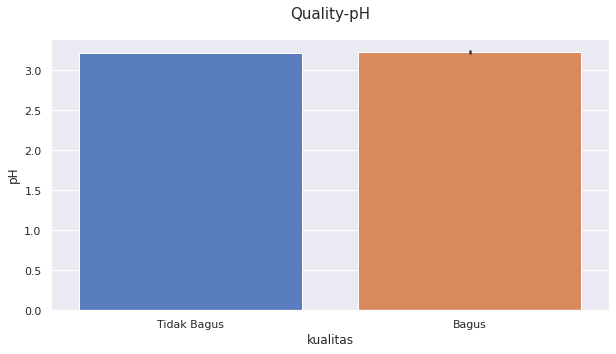

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Quality-pH', y=1.05, size=15)
sns.barplot(x=data["kualitas"],y=data["pH"],palette="muted")

Selanjutnya, menampilkan gambar diagram batang hubungan Kualitas dengan Sulphates dengan menggunakan code dibawah.

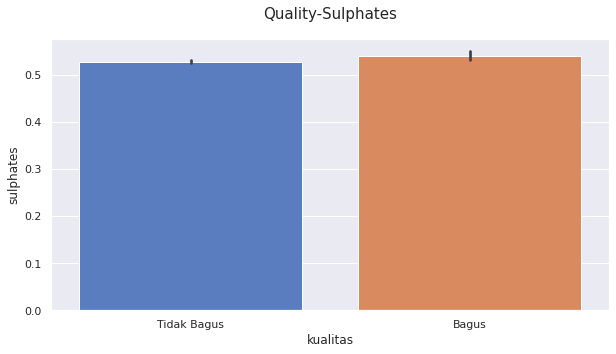

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Quality-Sulphates', y=1.05, size=15)
sns.barplot(x=data["kualitas"],y=data["sulphates"],palette="muted")

Selanjutnya, menampilkan gambar diagram batang hubungan Kualitas dengan Alcohol dengan menggunakan code dibawah.

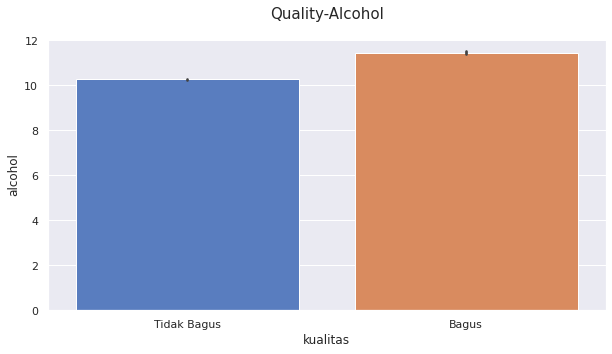

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Quality-Alcohol', y=1.05, size=15)
sns.barplot(x=data["kualitas"],y=data["alcohol"],palette="muted")

Dari data set dapat dilihat bahwa ada 2 kolom yang memiliki tipe data string64 yaitu type dan kualitas. Dengan tipe data tersebut pemrosesan tidak dapat dilakukan sehingga dilakukan proses pengubahan data tersebut kedalam bentuk angka. Setelah diganti, ditampilkan info dar data set untuk memastikan tipe data tersebut. Detail tertera pada coding dibawah ini.

In [ ]:
data.type.replace(('white','red'),(1,0), inplace=True) #digunakan untuk mengganti kata "white" dengan angka "1", dan mengganti "red" dengan "0"
data.kualitas.replace(('Bagus','Tidak Bagus'),(1,0), inplace=True) #digunakan untuk mengganti kata "bagus" dengan anka "1", dan mengganti "tidak bagus" dengan "0"
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  kualitas              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


Setelah melakukan proses pengubahan, langkah selanjutnya menampilkan isi data set untuk memastikan dataset sudah berubah sesuai dengan nilai integer yang sudah di declare sebelumnya

In [ ]:
data #digunakan untuk mamastikan data sudah diubah

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kualitas
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,0
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


Sebelum melakukan pemrosesan dari data tersebut, pengecekan data perlu dilakukan karena apabila terdapat data Nan atau Null pemrosesan selanjutnya tidak dilakukan. 
Code dibawah berfungsi untuk menampilkan NaN dan Null pada data set dimana apabila hasil yang dikeluarkan True dapat dikatakan pada data set tersebut terdapat data Nan dan Null.
Selanjutnya melakukan proses penghapusan data Nan dan Null

In [ ]:
print('is nan', data.isna().values.any()) #prints True
print('is null', data.isnull().values.any()) #prints True
data = data.dropna()

is nan True
is null True


Kemudian, untuk memastikan datanya sudah tidak terdapat Nan atau Null dilakukan pengecekan ulang, apabila hasilnya False dapat diartikan bahwa proses penghapusan data NaN dan Null sudah berhasil. Data set tersebut dapat digunakan untuk pemrosesan selanjutnya.

In [ ]:
print('is nan', data.isna().values.any()) #prints True
print('is null', data.isnull().values.any()) #prints True

is nan False
is null False


Keseluruhan coding dibawah ini berfungsi untuk mengencode categorial data. yang dilakukan dari tahap pendeteksian atau pemilihan lokasi integer berdasarkan posisi atau dapat dikatakan memilih kolom indepen sebagai catatan [baris,kolom] dimana -1 berarti kolom terakhir saja , kalau dikosongkan berarti seluruh baris . Kemudian melakukan pengubahan categorial data yang sudah dipilih sebelumnya kedalam bentuk ordinal dan kemudian membuat objek labelencoder

In [ ]:
X= data.iloc[:,:-1].values #iloc digunakan untuk pengindeksan / pemilihan berbasis lokasi integer berdasarkan posisi.
y=data.iloc[:,-1].values
labelencoder_y =LabelEncoder() #labelencoder digunakan membuat objek labelencoder 
y= labelencoder_y.fit_transform(y) #mengubah data menjadi data cardinal atau digunakan untuk fit objek ini ke kolom independen untuk mengembalikan array data yang dikodekan

Code dibawah menjelaskan proses pembagian data set menjadi dua bagian yaitu data train dan data test. Perbandingan yang dilakukan adalah 80:20 dimana data test yang digunakan 20 sedangkan data train 80.
Catatan :
Data train adalah Data yang digunakan untuk melatih algoritma
Data testing adalah Data yang dipakai untuk mengetahui performa algoritma yang sudah dilatih sebelumnya ketika menemukan data baru yang belum pernah dilihat sebelumnya.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) #digunakan untuk declare data train dan test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #digunakan untuk mengetahui isi dari data train dan test

(5170, 12) (1293, 12) (5170,) (1293,)


Setelah membagi data menjadi dua bagian yaitu X_train dan X_test, 
langkah berikutnya ialah  menormalisasi data tersebut menggunakan Standard Scaler atau dapat dikatakan melakukan penngubahan atau pengskalaan dari  nilai variable menjadi lebih kecil sehingga tidak dibutuhkan plot yang lebih besar. Seperti mengubah 10,20,40 menjadi 0.5,1,2 dan sebagainya.

In [ ]:
sc = StandardScaler() #digunakan untuk melakukan normalisasi data
X_train = sc.fit_transform(X_train) #digunakan untuk normalisasi X train 
X_test = sc.transform (X_test) #digunakan untuk normalisasi X test

Setelah data dibuat menjadi lebih kecil, kemudian dilanjutkan dengan proses pelatihan dari data training. Pelatihan dari data training dapat disebut juga model. Pada code dibawah dapat dilihat model yang digunakan adalah pemodelan sequential.  Dalam codingan dibawah ini jumlah hidden layer ada 6 ,dimana untuk menambahkan hidden layer menggunakan Dense, (10, input_dim=12, activation='relu')) sedangkan untuk didalamnya dapat dijelaskan bahwa 10 adalah neuron pada hidden layer 1, kemudian 12 adalah neuron pada bagian input sedangkan relu adalah salah satu fungsi aktivasi. Jumlah layer dan jumlah neuron dapat disesuaikan.  Kemudian melakukan konfigurasi pelatihan seperti tertera dibawah. Kemudian traning data dilakukan. 

Epoch adalah kondisi ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran, karena satu Epoch terlalu besar untuk dimasukkan (feeding) kedalam komputer maka dari itu kita perlu membaginya kedalam satuan kecil (batches)

Vall_loss adalah nilai fungsi biaya untuk data validasi silang Anda dan kerugian adalah nilai fungsi biaya untuk data pelatihan Anda. Pada data validasi, neuron yang menggunakan drop out tidak menjatuhkan neuron acak. Alasannya adalah selama pelatihan kami menggunakan drop out untuk menambah kebisingan untuk menghindari pemasangan yang berlebihan. 

binary_crossentropy=digunakan dalam tugas klasifikasi biner

In [ ]:
model = Sequential () #model adalah proses pelatihan sehingga pada code ini model yang digunakan adalah mode sequential
model.add(Dense(8, input_dim=12, activation='relu')) # menambahkan hidden layer dan juga mendeklarasikan jumlah neuron pada input dan melakukan fungsi aktivasi yang kita gunakan (relu) disini kita menggunakan rectifier function.
model.add(Dense(6, activation='relu')) #menambahkan hidden layer dan neuron dan mengaktifkan  
model.add(Dense(4, activation='relu')) #menambahkan hidden layer dan neuron dan mengaktifkan   
model.add(Dense(2, activation='relu')) #menambahkan hidden layer dan neuron dan mengaktifkan  
model.add(Dense(1,activation='sigmoid')) #menambahkan hidden layer dan neuron dan mengaktifkan 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics = ["accuracy"]) #menentukan konfigurasi pelatihan (binary_crossentropy, optimizer, metrik), 
history = model.fit(X_train, y_train, batch_size = 10, epochs=100, verbose=1, validation_data=(X_test,y_test)) # untuk melatih model dengan membagi data menjadi"batches" of size "batch_size", dan berulang kali melakukan iterasi pada seluruh dataset untuk sejumlah "epochs". validasi untuk mamantau validation loss and metrics di akhir setiap periode

Epoch 1/100
517/517 [==============================] - 1s 1ms/step - loss: 0.5667 - accuracy: 0.7485 - val_loss: 0.4148 - val_accuracy: 0.8136
Epoch 2/100
517/517 [==============================] - 1s 1ms/step - loss: 0.4114 - accuracy: 0.8143 - val_loss: 0.3799 - val_accuracy: 0.8144
Epoch 3/100
517/517 [==============================] - 1s 1ms/step - loss: 0.3943 - accuracy: 0.8188 - val_loss: 0.3755 - val_accuracy: 0.8167
Epoch 4/100
517/517 [==============================] - 1s 1ms/step - loss: 0.3857 - accuracy: 0.8236 - val_loss: 0.3753 - val_accuracy: 0.8121
Epoch 5/100
517/517 [==============================] - 1s 1ms/step - loss: 0.3815 - accuracy: 0.8277 - val_loss: 0.3736 - val_accuracy: 0.8229
Epoch 6/100
517/517 [==============================] - 1s 1ms/step - loss: 0.3793 - accuracy: 0.8298 - val_loss: 0.3736 - val_accuracy: 0.8198
Epoch 7/100
517/517 [==============================] - 1s 1ms/step - loss: 0.3764 - accuracy: 0.8306 - val_loss: 0.3726 - val_accuracy: 0.8213

Pada code dibawah ini dilakukan perhitungan nilai akurasi serta presisi dari data yang sudah ditraning sebelumnya. 

In [ ]:
y_pred_ann = model.predict(X_test) #y_pred_ann berisi prediksi yang ada di X_test
ac = accuracy_score(y_test, y_pred_ann.round()) #digunakan untuk menghitung akurasi
prec = metrics.precision_score(y_test, y_pred_ann.round()) #digunakan untuk menghitung presisi
print("Neural Network Accuracy = {0:.2f}%".format(ac*100)) #digunakan untuk mengeluarkan hasil akurasi dengan hasil 2 dibelakang koma
print("Neural Network Precision = {0:.2f}%".format(prec*100)) #digunakan untuk mengeluarkan hasil presisi dengan hasil 2 dibelakang koma

Neural Network Accuracy = 82.44%
Neural Network Precision = 56.15%


Setelah menghitung akurasi dan presisi, 
Selanjutnya menampilkan "model akurasi" yang dimana berhubungan dengan  nilai accuracy yang disesuaikan dengan jumlah epoch dan juga menampilkan "model loss"
yang dimana berhubungan dengan nilai loss yang disesuaikan dengan jumlah epoch 
nilai akurasi dan nilai loss yang digunakan dari data train dan data testing. Hal tersebut dilakukan untuk melihat seberapa dekat hasil data testing dengan data train 
Kedua model tersebut ditampilkan dalam bentuk plot grafik

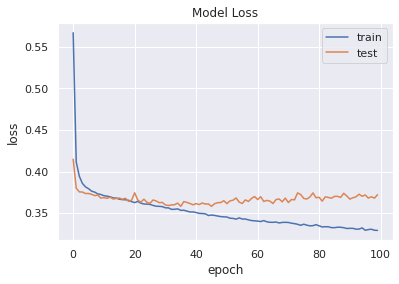

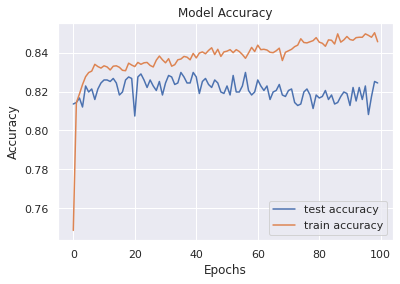

In [ ]:
#digunakan untuk membuat grafik model loss 
plt.plot(history.history['loss'], label='train loss') 
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
plt.savefig('Model_Loss.png')


#digunakan untuk membuat grafik model akurasi
plt.title('Model Accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Code ini untuk menampilkan hasil dari proses pelatihan sebelumnya dengan parameter yang ditampilkan lebih banyak ada akurasi, presisi, recall dan lain lain.
Pada code ini juga dilakukan prediksi kualitas bagus dan tidak bagus

In [ ]:
y_pred_ann = model.predict(X_test) #y_pred_ann berisi prediksi yang ada di X_test
y_pred_ann = y_pred_ann.round() #round disini digunakan untuk mengembalikan y_pred_ann untuk bernilai integer terdekat
print ('Neural Network: \n {} \n'.format (metrics.classification_report(y_pred_ann, y_test))) #membuat matriks Neural Network
ac_conf_matrix=metrics.confusion_matrix(y_pred_ann,y_test) #digunakan untuk membuat hasil untuk Neural Network

#digunakan untuk membuat tabel untuk conf_mat_ac
conf_mat_ac= pd.DataFrame(
    ac_conf_matrix,
    columns=["Prediction TIDAK BAGUS","Prediction BAGUS"],
    index=["Actual TIDAK BAGUS","Actual BAGUS"]
                          )
print(conf_mat_ac) #digunakan untuk menampilkan hasil conf_mat_ac

Neural Network: 
               precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      1163
         1.0       0.30      0.56      0.39       130

    accuracy                           0.82      1293
   macro avg       0.62      0.71      0.64      1293
weighted avg       0.88      0.82      0.85      1293
 

                    Prediction TIDAK BAGUS  Prediction BAGUS
Actual TIDAK BAGUS                     993               170
Actual BAGUS                            57                73


Langkah berikutnya ialah melakukan analisa data set untuk mengetahui kualitas wine bagus tidak bagus menggunakan teknik KNeighborsClassifier, Semua pemroresan hingga mendapatkan hasil akurasi dan presisi dijelaskan pada code dibawah ini

In [ ]:
knn = KNeighborsClassifier() #knn merupakan machine learning algorithm untuk klasifikasi dan regresi dengan melakukan pendekatan
knn.fit(X_train, y_train)
y_pred_knn= knn.predict(X_test)
acc_knn = metrics.accuracy_score(y_test, y_pred_knn) #digunakan untuk menghitung akurasi
print("Accuracy : ", acc_knn) #digunakan untuk menampilkan hasil akurasi
prec_knn = metrics.precision_score(y_test, y_pred_knn) #digunakan untuk menghitung presisi
print("Precision:", prec_knn) #digunakan untuk menampilkan hasil presisi
print("K-Nearest Neighbor Accuracy = {0:.2f}%".format(acc_knn*100)) #digunakan untuk membuat hasil akurasi menjadi persen dengan 2 angka dibelakang koma
print("K-Nearest Neighbor Precision = {0:.2f}%".format(prec_knn*100)) #digunakan untuk membuat hasil presisi menjadi persen dengan 2 angka dibelakang koma

Accuracy :  0.8414539829853055
Precision: 0.5904761904761905
K-Nearest Neighbor Accuracy = 84.15%
K-Nearest Neighbor Precision = 59.05%


Sama seperti ANN, 
hasil dari KNN juga ditampilkan  dengan parameter lebih banyak yaitu akurasi, presisi, recall dan lain lain.
Pada code ini juga dilakukan prediksi kualitas bagus dan tidak bagus

In [ ]:
y_pred_knn = y_pred_knn.round() #round disini digunakan untuk mengembalikan y_pred_ann untuk bernilai integer terdekat
print ('K-Neigbours: \n {} \n'.format (metrics.classification_report(y_pred_knn, y_test))) #digunakan untuk membuat matriks K-Neighbour
ac_conf_matrix_knn=metrics.confusion_matrix(y_pred_knn,y_test) #digunakan untuk menampilkan hasil dari K-Neighbour

#digunakan untuk membuat tabel untuk conf_mat_ac
conf_mat_ac_knn= pd.DataFrame(
    ac_conf_matrix_knn,
    columns=["Prediction TIDAK BAGUS","Prediction BAGUS"],
    index=["Actual TIDAK BAGUS","Actual BAGUS"]
                          )
print(conf_mat_ac_knn)

K-Neigbours: 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1083
           1       0.51      0.59      0.55       210

    accuracy                           0.84      1293
   macro avg       0.71      0.74      0.73      1293
weighted avg       0.85      0.84      0.85      1293
 

                    Prediction TIDAK BAGUS  Prediction BAGUS
Actual TIDAK BAGUS                     964               119
Actual BAGUS                            86               124


Setelah itu melakukan perbandingan hasil akurasi yang dihasilkan pada Neural Network dan K-Nearest Neighbour

In [ ]:
conclusion_accuracies= pd.DataFrame({'Models': ["Neural Network","K-Nearest Neigbors"],
                           'Accuracies (in %)': [accuracy_score(y_test, y_pred_ann.round())*100,metrics.accuracy_score(y_test, y_pred_knn)*100,]})
conclusion_accuracies

,Models,Accuracies (in %)
0,Neural Network,82.443929
1,K-Nearest Neigbors,84.145398


Selanjutnya, memplot dalam bentuk gambar perbandingan nilai akurasi antara teknik ANN dan KNN 

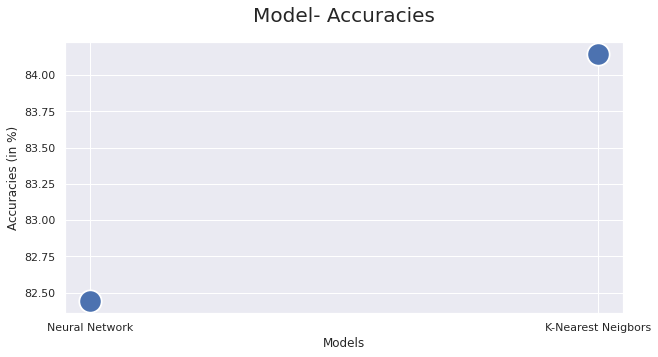

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Model- Accuracies', y=1.05, size=20)
sns.scatterplot(x=conclusion_accuracies["Models"],y=conclusion_accuracies["Accuracies (in %)"],palette="muted",s=500)

Setelah itu melakukan perbandingan hasil presisi yang dihasilkan pada Neural Network dan K-Nearest Neighbour

In [ ]:
conclusion_precision= pd.DataFrame({'Models': ["Neural Network","K-Nearest Neigbors"],
                           'Precision (in %)': [metrics.precision_score(y_test, y_pred_ann.round())*100,metrics.precision_score(y_test, y_pred_knn)*100,]})
conclusion_precision

,Models,Precision (in %)
0,Neural Network,56.153846
1,K-Nearest Neigbors,59.047619


Selanjutnya, memplot dalam bentuk gambar perbandingan nilai presisi 
antara teknik ANN dan KNN 

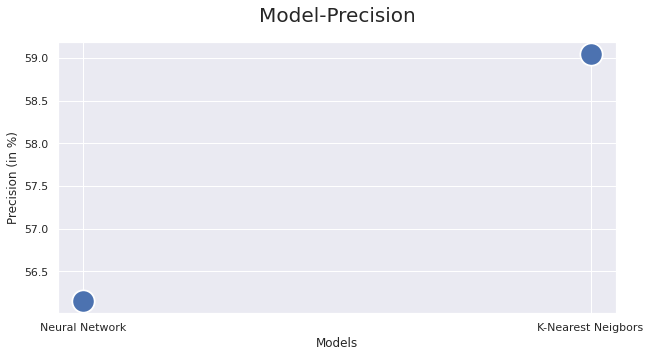

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Model-Precision', y=1.05, size=20)
sns.scatterplot(x=conclusion_precision["Models"],y=conclusion_precision["Precision (in %)"],palette="muted",s=500)